# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_float
import math
from skimage.color import rgb2gray
import scipy.misc
from skimage.filters import threshold_otsu
from scipy import signal

Pretty printing has been turned OFF


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [2]:
def dirac(n=0, N=20):
    if n>N-1:
        raise ValueError ("n should be < N-1")
            
    s=np.zeros((N, ))
            
    s[n]=1         
    return s

def step (n=0, N=20):
    if n>N-1:
        raise ValueError ("n should be < N-1")
    
    s=np.zeros((N, ))
   
    for n in range (n,N):
        s[n]=1
        
    return s

def conv_fn(x0,h) :
    x = np.zeros(x0.size + 2*h.size)
    for i in range(0, x0.size):
        x[i + h.size] = x0[i]
    h_f = h[::-1]
   
    conv = np.zeros(x.size)
    for i in range(0, x.size):
        for j in range(0, h.size):
            conv[i] += x[i-j] * h[j]
            
    return conv

<Container object of 3 artists>

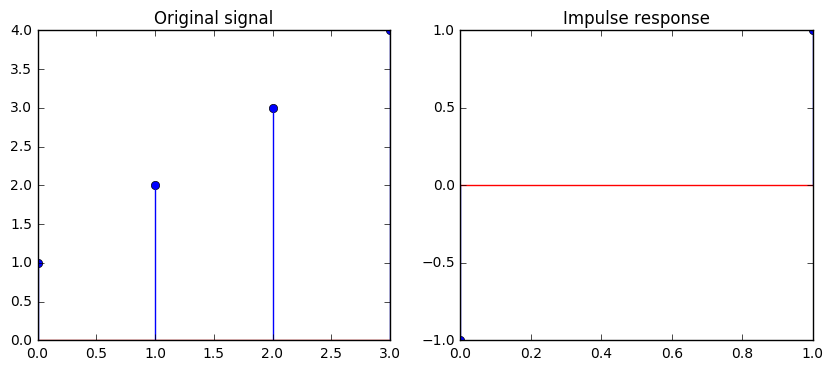

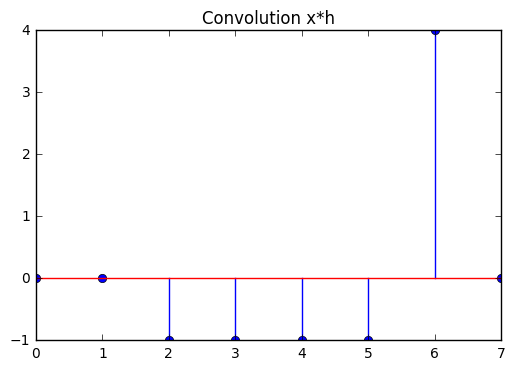

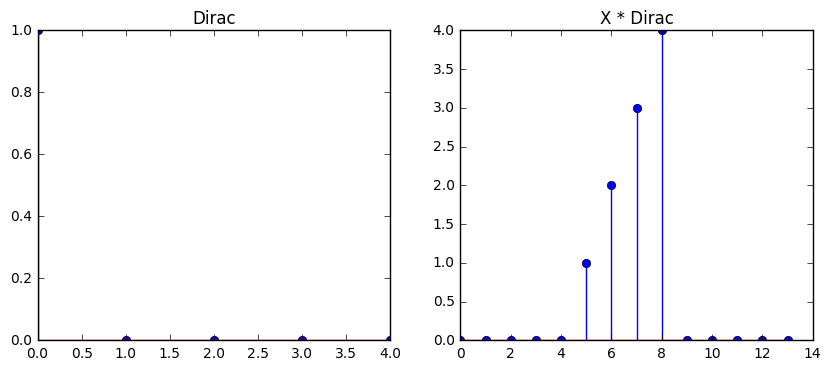

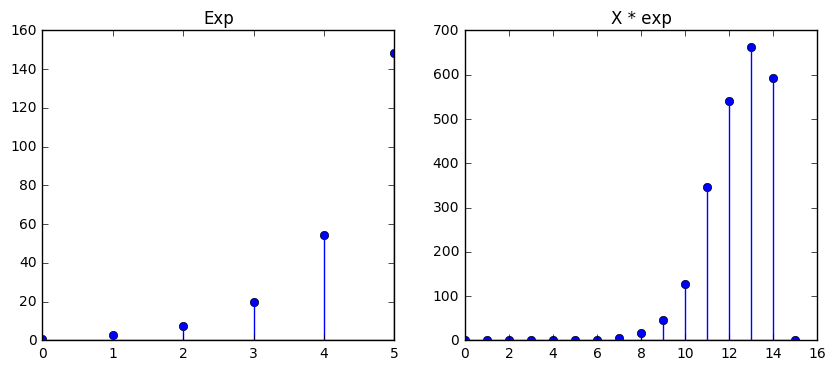

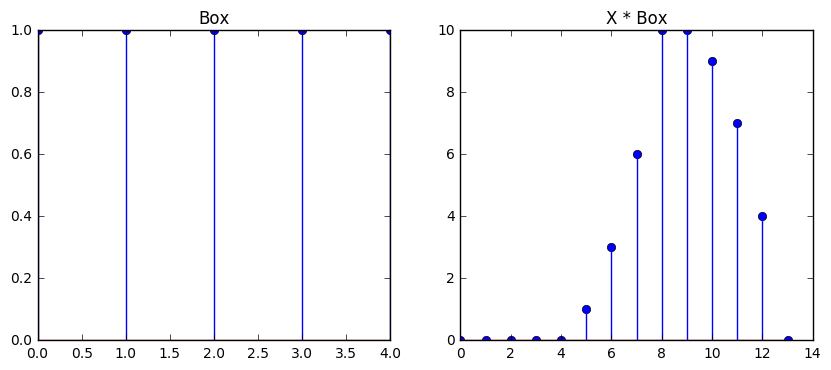

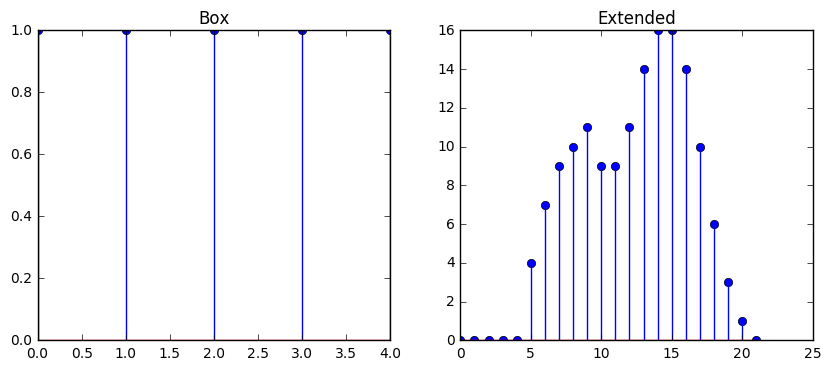

In [3]:
x = np.array([1, 2, 3, 4])
h = np.array([-1,1])

# Original signal
fig1 = plt.figure(figsize=(10,4))
fig1.add_subplot(1,2,1)
plt.title('Original signal')
plt.stem(x)

fig1.add_subplot(1,2,2)
plt.title('Impulse response')
plt.stem(h)


# x * h
plt.figure()
plt.stem(conv_fn(x,h))
plt.title('Convolution x*h')


# signal * dirac
h_sdi = dirac(0,5)

fig2 = plt.figure(figsize=(10,4))
fig2.add_subplot(1,2,1)
plt.title('Dirac')
plt.stem(h_sdi)

fig2.add_subplot(1,2,2)
plt.title('X * Dirac')
plt.stem(conv_fn(x,h_sdi))


# signal * exp
m_exp = np.zeros(6)

for i in range(0,(m_exp.size)):
    m_exp[i] = math.exp(i)

fig3 = plt.figure(figsize=(10,4))
fig3.add_subplot(1,2,1)
plt.title('Exp')
plt.stem(m_exp)
  
fig3.add_subplot(1,2,2)
plt.title('X * exp')
plt.stem(conv_fn(x,m_exp))


#4 signal * step
m_step=step(0,5)
fig4 = plt.figure(figsize=(10,4))
fig4.add_subplot(1,2,1)
plt.title('Box')
plt.stem(m_step)
  
fig4.add_subplot(1,2,2)
plt.title('X * Box')
plt.stem(conv_fn(x,m_step))


#5  Extended signal
extended_signal = np.array([4,3,2,1 ,1,2,3,4, 4,3,2,1])

fig5 = plt.figure(figsize=(10,4))
fig5.add_subplot(1,2,1)
plt.title('Box')
plt.stem(m_step)
  
fig5.add_subplot(1,2,2)
plt.title('Extended')
plt.stem(conv_fn(extended_signal,m_step))

## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [4]:
def convolve_2d(inkernel, inimg):

    xcenter = int((inkernel.shape[0]+1)/2)
    ycenter = int((inkernel.shape[1]+1)/2)
    
    start=0
    padded_img = np.pad(inimg, ((start,xcenter), (start,ycenter)),  'constant')
  
    out = np.zeros(padded_img.shape)
    
    for x in range(padded_img.shape[0]):
        for y in range(padded_img.shape[1]):
            for i in range(inkernel.shape[0]):
                for j in range(inkernel.shape[1]):
                    # if i>=0 and i<padded_img.shape[0] and j>=0 and j<padded_img.shape[1]:
                        out[x,y] += inkernel[i,j] * padded_img[x-i,y-j] 
    return out[(xcenter-1):-(xcenter-1), (ycenter-1):-(ycenter-1)]

(511, 511)


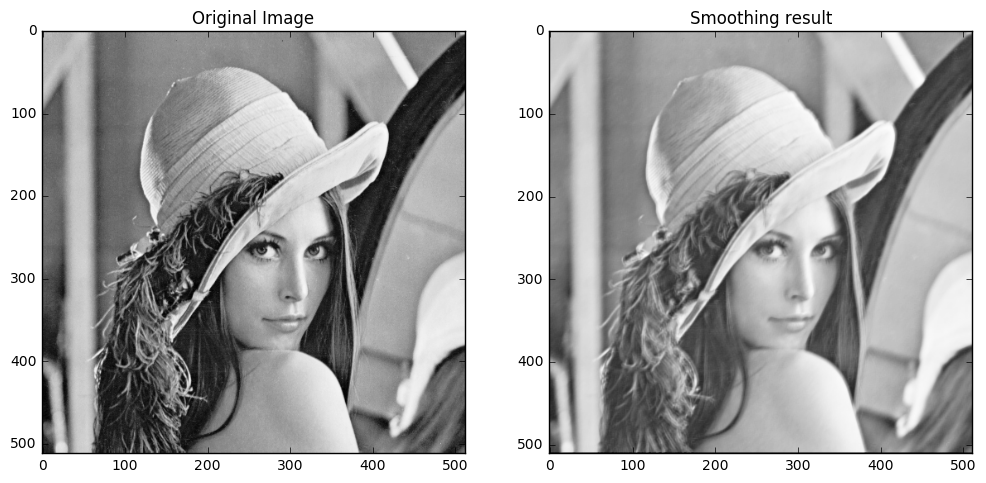

In [6]:
Path = './../images/'
image_name = 'lena-grey.bmp'
lena_im = img_as_float(io.imread(Path.__add__(image_name)))

multiplier = 1/256

kernel = np.array([[1, 4, 6, 4, 1], 
                   [4, 16, 24, 16, 4], 
                   [6, 24, 36, 24, 6], 
                   [4, 16, 24, 16, 4], 
                   [1, 4, 6, 4,1]])

for i in range(1,kernel.shape[0]):
    for j in range(1,kernel.shape[1]):
        kernel[i][j] = multiplier*kernel[i][j];

convolution_res = convolve_2d(kernel, lena_im)
print(convolution_res.shape)
fig1 = plt.figure(figsize=(12,12))

a=fig1.add_subplot(1,2,1)
a.set_title("Original Image")
imgplot = plt.imshow(lena_im,cmap=cm.Greys_r)

a=fig1.add_subplot(1,2,2)
a.set_title("Smoothing result")
imgplot = plt.imshow(convolution_res, cmap=cm.Greys_r)



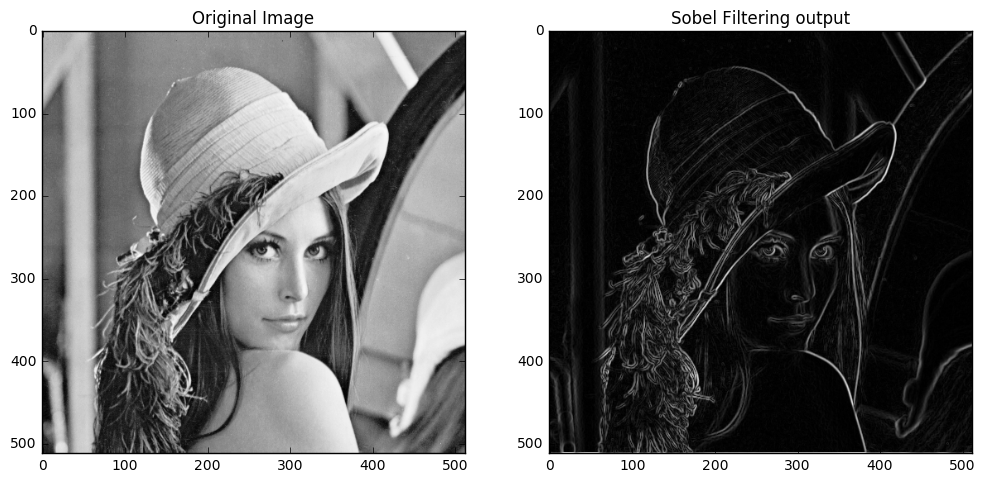

In [7]:
sobel_horizonral = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_vertical = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

#test1 = img_as_float(io.imread(Path.__add__('test.bmp')))
#test=rgb2gray(test1)
#print(test)

fig1 = plt.figure(figsize=(12,12))
#convolve_hoizonral = convolve_2d(sobel_horizonral,test)
#convolve_vertical = convolve_2d(sobel_vertical,test)

convolve_hoizonral = convolve_2d(sobel_horizonral,lena_im)
convolve_vertical = convolve_2d(sobel_vertical,lena_im)

lena_res = np.sqrt(np.power(convolve_hoizonral,2) + np.power(convolve_vertical,2))

a=fig1.add_subplot(1,2,1)

a.set_title("Original Image")
imgplot = plt.imshow(lena_im,cmap=cm.Greys_r)

a=fig1.add_subplot(1,2,2)
a.set_title("Sobel Filtering output")
imgplot = plt.imshow(lena_res, cmap=cm.Greys_r)

#scipy.misc.toimage(lena_res, cmin=0.0).save('test.bmp')

## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

0.513671875
0.552734375


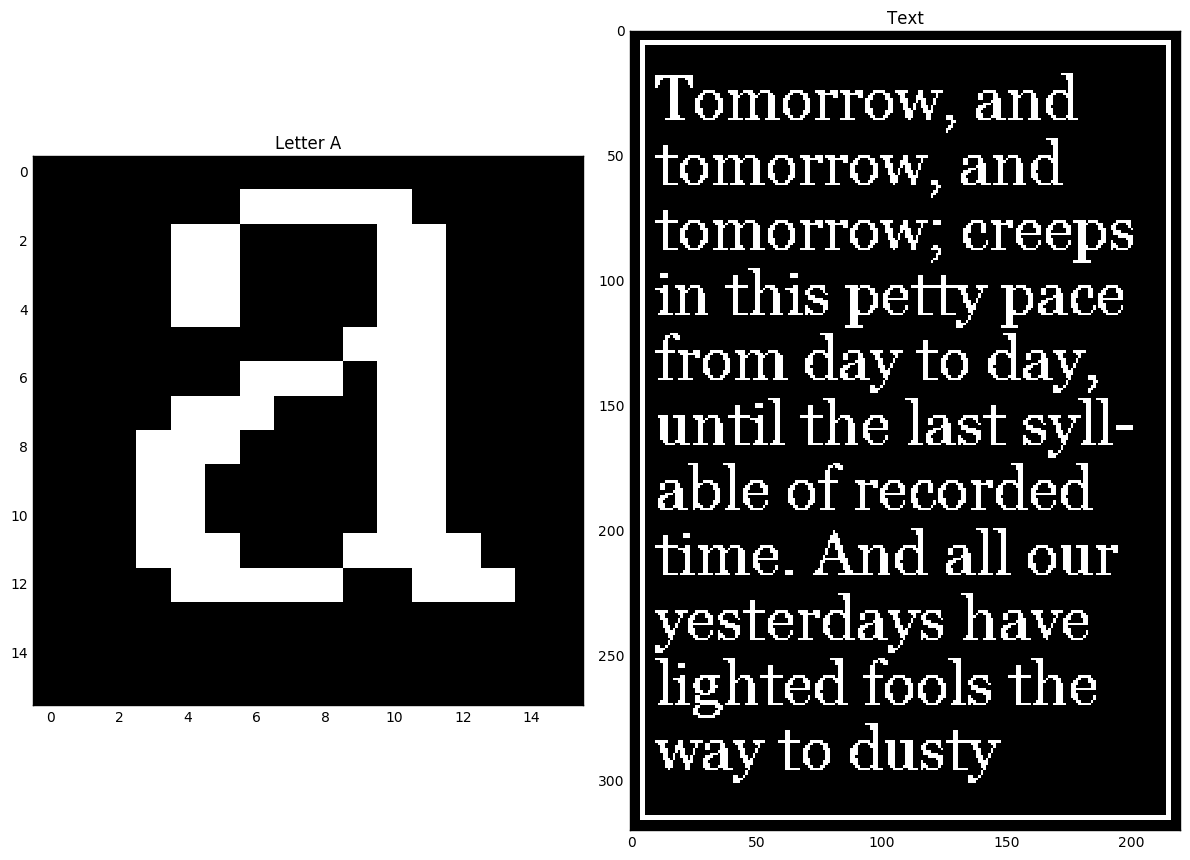

In [9]:
Path = './../images/'
image1_name = 'a.png'
image2_name = 'text.png'
a_image = img_as_float(io.imread(Path.__add__(image1_name), as_grey=True))
text_image = img_as_float(io.imread(Path.__add__(image2_name), as_grey=True))


fig = plt.figure(figsize=(12,12))
a_th= threshold_otsu(a_image)
res_a_th = img_as_float(a_image < a_th)
a = fig.add_subplot(1,2,1)
a.set_title("Letter A")
io.imshow(res_a_th)

a = fig.add_subplot(1,2,2)
text_th=threshold_otsu(text_image)
res_text_th = img_as_float(text_image  < text_th)
a.set_title("Text")
io.imshow(res_text_th)

print(a_th)
print(text_th)


Coordinates of discovered matches:
38 150
64 144
116 175
142 96
142 169
168 130
194 23
220 138
246 103
246 160


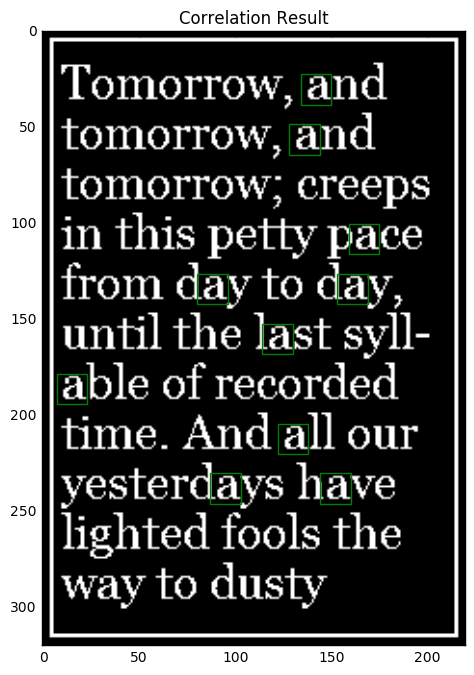

In [50]:
fig = plt.figure(figsize=(12,12))
a = fig.add_subplot(1,2,1)
#a.set_axis_off()
a.set_title("Correlation Result")
correlation_res = signal.correlate2d(res_text_th, res_a_th)
imgplot=plt.imshow(res_text_th, cmap=cm.Greys_r)
print('Coordinates of discovered matches:')
for i in range(10):
    [x, y] = np.unravel_index(np.argmax(correlation_res), correlation_res.shape)
    print(x,y)
    wa, ha = res_a_th.shape
    rect = plt.Rectangle((y-res_a_th.shape[1], x-res_a_th.shape[1]), wa, ha, edgecolor='g', facecolor='none')
    a.add_patch(rect)

    correlation_res[x,y] = 0